# **Capstone Proposal – Lending Club Loan Default Prediction**


# Domain Background

Lending club is a leading P2P lending company, based out of San Francisco, California with Total
disbursed loan amount of USD 47 Billion as of 31-Mar-2019. It offers loan trading on secondary
market and allows borrowers to create unsecured personal loans and matches them to Investors,
who can decide whether to invest in a particular set of loans based on the supplied information. This
helps investors earn higher returns and borrowers’ access much needed funding. Lending club
provides historical loan information, which can be analysed using machine learning algorithms. This
can help to identify portfolios that are likely to default thus helping the investor avoid them.


# Problem Statement

To Identify whether a borrower will default by applying machine learning methods on historical loan
data provided by Lending Club. The idea is to help investors identify loans with high chances of default.
Loan default prediction is a binary classification problem wherein default event can happen either
during the life time of the loan when the borrower defaults on interest payments or it can happen at
the end when the borrower defaults on principal payment.

A binary classification problem allows the flexibility to choose from multiple machine learning
algorithms, and the usage of quantitative metrics such as accuracy, precision, f1 score, etc to rank
classification results.


# Datasets and Inputs

The dataset is from LendingClub: (https://www.lendingclub.com/info/download-data.action).
There are 3 files: LoanStats, browseNotes and RejectStats. Together, these files contain complete loan
data for all loans issued from 2007 through 2019 Q1. LoanStats tab consists of 152 columns in the
dataset, browseNotes consists of 121 columns, while RejectStats consists of 10 columns. These files
contain information on borrowers' credit history, their personal information (such as annual income,
years of employment, zip-code, etc.), loan information (description, type, interest rate, grade, etc.),
current loan status (Current, Late, Fully Paid, etc.) and latest credit and payment
information.
I have chosen LoanStats data from 2012-2015 for this task.

# Solution Statement

The solution is to build a classification algorithm using Machine Learning that predicts whether a
loan default or not. The results are to be measured using various metrics defined in Evaluation
metrics section.


# Benchmark Model

    1) A naïve benchmark model would be to identify most frequent occurrence of loan default vs no
    default and use that as a naïve model prediction
    2) Compare model performance with respect to reference models using the mentioned Evaluation
    metrics


# Evaluation Metrics

Evaluation metrics consists of Confusion Matrix, Accuracy, Specificity, Sensitivity, Precision


# Project Design

    **1) Data Pre-processing and Cleaning:**
        a. Missing value/Null value treatment
        b. Encode Categorical variables
        c. Extract info from text
        d. Outlier handling
        e. Normalizing feature variables
    **2) Train Classifier**
        a. Split data into Train and Test set
        b. Perform Cross-validation
        c. Compare Training performance vis-à-vis different algorithms
    **3) Test model performance**
        a. Compute test results
        b. Compare test results with Benchmark models


# Reference Models

    1. Naive Benchmark model
    2. http://cs229.stanford.edu/proj2015/199_report.pdf

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root_path = '/content/gdrive/My Drive/Colab Notebooks/CapstoneProject'
import os
os.chdir(root_path)
print(os.getcwd())

/content/gdrive/My Drive/Colab Notebooks/CapstoneProject


In [0]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics 
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

Load Loan data from 2012 to 2015

In [0]:
loandata_2 = pd.read_excel('LoanStats3b.xlsx')
loandata_3 = pd.read_csv('LoanStats3c.csv')
loandata_4 = pd.read_csv('LoanStats3d.csv')
loandata = pd.concat([loandata_2,loandata_3,loandata_4])


In [0]:
def null(df):
        null_val = df.isnull().sum()
        null_val_percent = 100 * df.isnull().sum() / len(df)
        null_val_table = pd.concat([null_val, null_val_percent], axis=1)
        null_val_table_ren_columns = null_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        null_val_table_ren_columns = null_val_table_ren_columns[
            null_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(null_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return null_val_table_ren_columns
null(loandata)

Dataframe has 144 columns.
There are 99 columns that have missing values.


,Missing Values,% of Total Values
id,844905,100.0
member_id,844905,100.0
sec_app_earliest_cr_line,844905,100.0
sec_app_inq_last_6mths,844905,100.0
sec_app_mort_acc,844905,100.0
sec_app_open_acc,844905,100.0
sec_app_revol_util,844905,100.0
sec_app_open_act_il,844905,100.0
sec_app_num_rev_accts,844905,100.0
sec_app_chargeoff_within_12_mths,844905,100.0


In [0]:
def removeNulls(dataframe, axis =1, percent=0.3):
    '''
    * removeNull function will remove the rows and columns based on parameters provided              
    '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df

In [0]:
loandata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,12000,12000,12000.0,36 months,0.0762,373.94,A,A3,Systems Engineer,3 years,MORTGAGE,96500.0,Not Verified,2013-12-01 00:00:00,Fully Paid,n,NaN,Borrower added on 12/31/13 > Bought a new ho...,debt_consolidation,Debt Consolidation and Credit Transfer,782xx,TX,12.61,0,2003-09-01 00:00:00,0,NaN,NaN,17,0,13248,0.557,30,f,0.0,...,233004.0,46738.0,14800.0,53404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,N,NaT,NaN,NaT,NaN,NaN,NaN
1,NaN,NaN,27050,27050,27050.0,36 months,0.1099,885.46,B,B2,Team Leadern Customer Ops & Systems,10+ years,OWN,55000.0,Verified,2013-12-01 00:00:00,Fully Paid,n,NaN,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,Debt Consolidation,481xx,MI,22.87,0,1986-10-01 00:00:00,0,NaN,NaN,14,0,36638,0.612,27,w,0.0,...,138554.0,70186.0,35700.0,33054.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,N,NaT,NaN,NaT,NaN,NaN,NaN
2,NaN,NaN,12000,12000,12000.0,36 months,0.1199,398.52,B,B3,LTC,10+ years,MORTGAGE,130000.0,Source Verified,2013-12-01 00:00:00,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,809xx,CO,13.03,0,1997-11-01 00:00:00,1,NaN,NaN,9,0,10805,0.67,19,f,0.0,...,365874.0,44327.0,10700.0,57674.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,N,NaT,NaN,NaT,NaN,NaN,NaN
3,NaN,NaN,28000,28000,28000.0,36 months,0.0762,872.52,A,A3,Area Sales Manager,5 years,MORTGAGE,325000.0,Source Verified,2013-12-01 00:00:00,Fully Paid,n,NaN,NaN,debt_consolidation,Pay off other Installment loan,945xx,CA,18.55,0,1994-11-01 00:00:00,1,NaN,NaN,15,0,29581,0.546,31,w,0.0,...,850886.0,199739.0,42200.0,196686.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,N,NaT,NaN,NaT,NaN,NaN,NaN
4,NaN,NaN,27600,27600,27600.0,60 months,0.1997,730.78,D,D5,Street Operations Supervisor,6 years,MORTGAGE,73000.0,Source Verified,2013-12-01 00:00:00,Charged Off,n,NaN,Borrower added on 12/31/13 > I had some wate...,debt_consolidation,Consolidation of debt and home improve.,802xx,CO,23.13,1,1989-06-01 00:00:00,1,7.0,NaN,10,0,27003,0.828,24,f,0.0,...,261675.0,37808.0,19200.0,14075.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,N,NaT,NaN,NaT,NaN,NaN,NaN


In [0]:
loandata.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,844905.000000,844905.000000,844905.000000,844905.000000,8.449050e+05,0.0,844903.000000,844905.000000,844905.000000,417489.000000,133413.000000,844905.000000,844905.000000,8.449050e+05,844905.000000,844905.000000,844905.000000,844905.000000,844905.000000,844905.000000,844905.000000,8.449050e+05,844905.000000,844905.000000,844905.000000,844905.000000,221723.000000,844905.0,511.000000,509.000000,844905.000000,8.171640e+05,8.171640e+05,21372.000000,21372.000000,...,817164.000000,817163.000000,817164.000000,828850.000000,789818.000000,817164.000000,817164.000000,817164.000000,817011.000000,829081.000000,844905.000000,844905.000000,8.171640e+05,8.374100e+05,8.374100e+05,8.171640e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3175.0,3175.000000,3175.0,3175.000000,2576.000000,3175.000000,3175.000000,18016.000000,18016.000000,18016.000000
mean,NaN,NaN,14939.696948,14939.135790,14932.063123,442.434209,7.532275e+04,NaN,18.374384,0.322589,0.675192,34.028293,70.418160,11.659297,0.202209,1.705264e+04,25.426159,383.816553,383.636842,16136.534712,16129.040362,12743.893487,3163.566784,1.548779e+00,227.525657,36.968992,4321.362171,0.015100,43.091583,1.0,109981.011585,18.310118,0.005237,2.256894e+02,1.394565e+05,1.109021,2.928832,...,8.320806,15.016395,5.775051,11.648117,0.000762,0.003551,0.088390,2.048458,94.304752,49.741990,0.122878,0.050851,1.709528e+05,4.912871e+04,2.104499e+04,4.065743e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,117.620406,3.0,14.286614,348.817884,9012.282765,184.356957,4689.387766,46.970718,11.152864
std,NaN,NaN,8441.712188,8441.289292,8437.685622,244.414453,6.471264e+04,NaN,8.418290,0.875358,0.960116,21.864047,27.361003,5.331202,0.593160,2.243848e+04,11.830677,1665.557471,1664.679971,10433.798415,10429.278255,8421.345001,3233.597257,1.122202e+01,938.951502,162.732023,6206.439501,0.137472,21.155240,0.0,52730.379847,7.169233,0.079514,1.031098e+04,1.537487e+05,1.242675,3.089987,...,4.424291,8.053379,3.203892,5.332581,0.029418,0.063910,0.486825,1.728254,8.502129,35.414588,0.364589,0.398070,1.730153e+05,4.655371e+04,2.079850e+04,4.206008e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,93.057490,0.0,9.631803,275.045680,5865.702969,176.138575,3423.046424,7.672675,8.381565
min,NaN,NaN,1000.000000,1000.000000,900.000000,4.930000,0.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.500000e-09,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+0

In [0]:
loan_data = loandata.copy(deep=True)

In [0]:
loan_data = removeNulls(loan_data, axis =1,percent = 0.3)

Number of Columns dropped	:  58

Old dataset rows,columns (844905, 144) 
New dataset rows,columns (844905, 86)


Remove ID, member id and other columns with high missing values

In [0]:
loan_data['loan_status'].value_counts()

Fully Paid            641830
Charged Off           146846
Current                53659
Late (31-120 days)      1552
In Grace Period          542
Late (16-30 days)        418
Default                   58
Name: loan_status, dtype: int64

Consider only those cases where Loan is either fully repaid or in default

In [0]:
loan_data = loan_data[(loan_data['loan_status']=="Fully Paid") | (loan_data['loan_status']=="Charged Off") | (loan_data['loan_status']=="Default")]
dummy = {"Fully Paid":0, "Charged Off":1,"Default":1}   #converting target variable to boolean
loan_data= loan_data.replace({"loan_status": dummy})

In [0]:
loan_data['loan_status'].value_counts()

0    641830
1    146904
Name: loan_status, dtype: int64

In [0]:
#Remove columns where there is only 1 unique value
unique = loan_data.nunique()
unique = unique[unique.values == 1]
loan_data.drop(labels = list(unique.index), axis =1, inplace=True)
print("Remaining ",loan_data.shape ,"rows & columns.")

Remaining  (788734, 83) rows & columns.


In [0]:
loan_data.iloc[:20000,:].to_csv(r"C:\Users\Arnab\Desktop\Udacity-Nanodegree\File.csv")

In [0]:
##Remove irrelevant columns
notReqdCols = ['installment','issue_d','verification_status','title','zip_code','addr_state','earliest_cr_line','inq_last_6mths','initial_list_status','out_prncp','tax_liens','out_prncp_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','application_type','acc_now_delinq','acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim','chargeoff_within_12_mths','delinq_amnt','mo_sin_old_il_acct',
               'debt_settlement_flag','pub_rec_bankruptcies']
loan_data.drop(labels = notReqdCols, axis =1, inplace=True)
print("So now we are left with",loan_data.shape ,"rows & columns.")


So now we are left with (788734, 53) rows & columns.


In [0]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'loan_status', 'purpose', 'dti', 'delinq_2yrs',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'last_pymnt_amnt',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'],
      dtype='ob

In [0]:
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','annual_inc','dti']

loan_data[numeric_columns] = loan_data[numeric_columns].apply(pd.to_numeric)

In [0]:
#Purpose of loan : Drop records where values are less than 0.8% and loan purpose is others
(loan_data.purpose.value_counts()*100)/len(loan_data)

debt_consolidation    63.804226
credit_card           25.245528
home_improvement       6.043141
major_purchase         1.899951
small_business         1.055395
medical                1.011395
car                    0.940364
Name: purpose, dtype: float64

In [0]:
del_loan_purpose = (loan_data.purpose.value_counts()*100)/len(loan_data)
del_loan_purpose = del_loan_purpose[(del_loan_purpose < 0.8) | (del_loan_purpose.index == 'other')]

loan_data.drop(labels = loan_data[loan_data.purpose.isin(del_loan_purpose.index)].index, inplace=True)
print("So now we are left with",loan_data.shape ,"rows & columns.")

print(loan_data.purpose.unique())

So now we are left with (673212, 53) rows & columns.
['debt_consolidation' 'credit_card' 'major_purchase' 'home_improvement'
 'small_business' 'car' 'medical']


In [0]:
## Derive Loan to income ratio
loan_data['loan_income_ratio']= loan_data['loan_amnt']/loan_data['annual_inc']

In [0]:
## Create bins for loan amount
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan_data['loan_amnt_range'] = pd.cut(loan_data['loan_amnt'], bins, labels=slot)

In [0]:
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan_data['annual_inc_range'] = pd.cut(loan_data['annual_inc'], bins, labels=slot)

In [0]:
def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_data))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

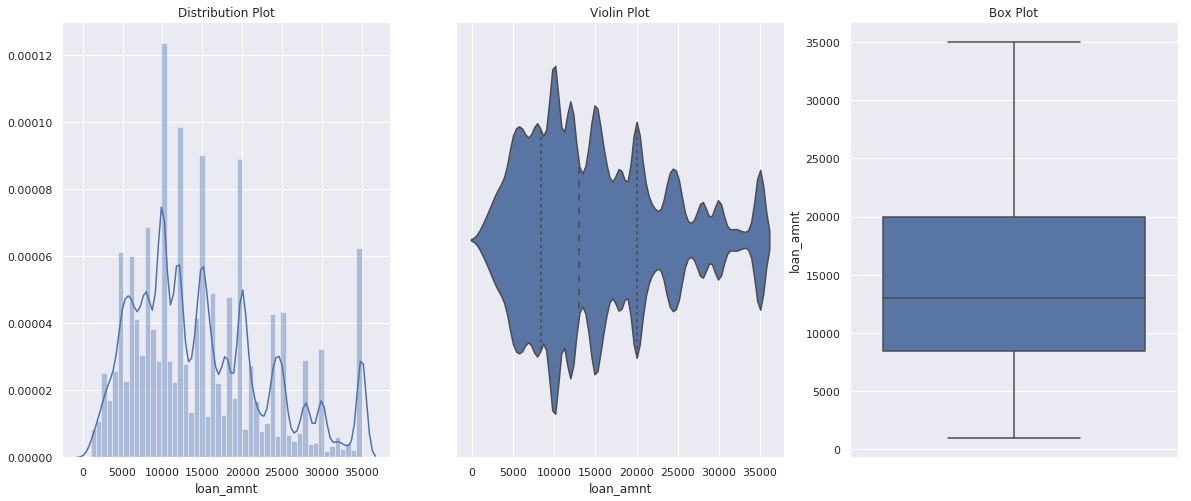

In [0]:
univariate(df=loan_data,col='loan_amnt',vartype=0)

In [0]:
loan_data["annual_inc"].describe()

count    6.732120e+05
mean     7.516540e+04
std      6.628642e+04
min      0.000000e+00
25%      4.515954e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

In [0]:
outliers = loan_data["annual_inc"].quantile(0.99)
loan_data = loan_data[loan_data["annual_inc"] < outliers]
loan_data["annual_inc"].describe()

count    665912.000000
mean      71828.364890
std       36884.828671
min           0.000000
25%       45000.000000
50%       64000.000000
75%       90000.000000
max      249955.000000
Name: annual_inc, dtype: float64

In [0]:
loan_data.home_ownership.unique()

array(['MORTGAGE', 'OWN', 'RENT', 'NONE', 'OTHER', 'ANY'], dtype=object)

In [0]:
# Remove data with home_ownership'=='OTHER', 'NONE', 'ANY'
rowsToRem = ['OTHER', 'NONE', 'ANY']
loan_data.drop(loan_data[loan_data['home_ownership'].isin(rowsToRem)].index,inplace=True)
loan_data.home_ownership.unique()

array(['MORTGAGE', 'OWN', 'RENT'], dtype=object)

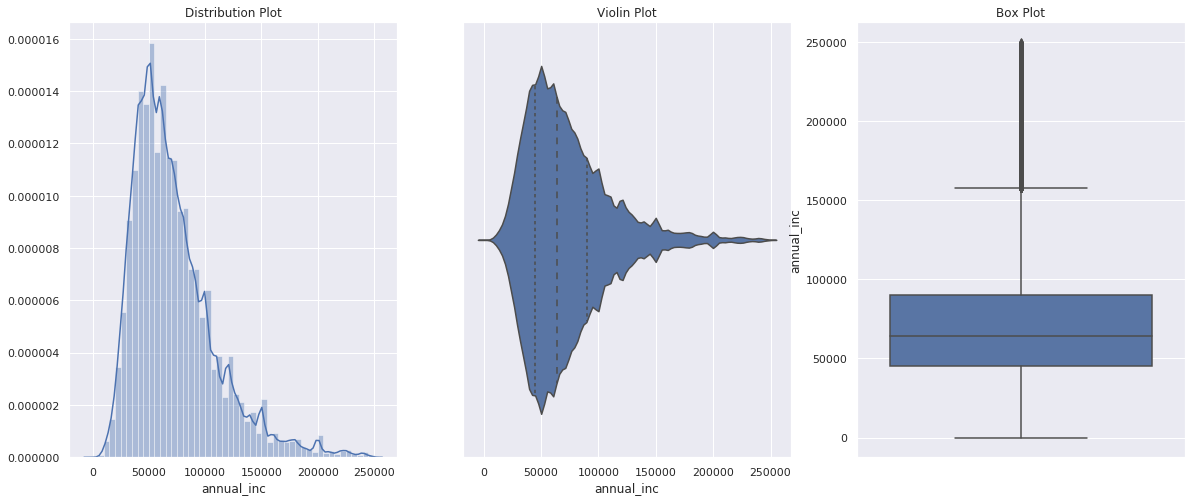

In [0]:
univariate(df=loan_data,col='annual_inc',vartype=0)

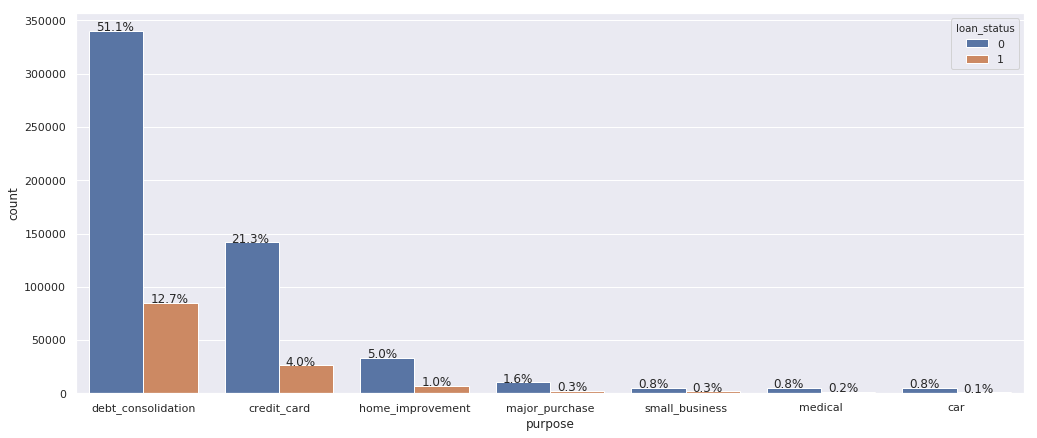

In [0]:
univariate(df=loan_data,col='purpose',vartype=1,hue='loan_status')

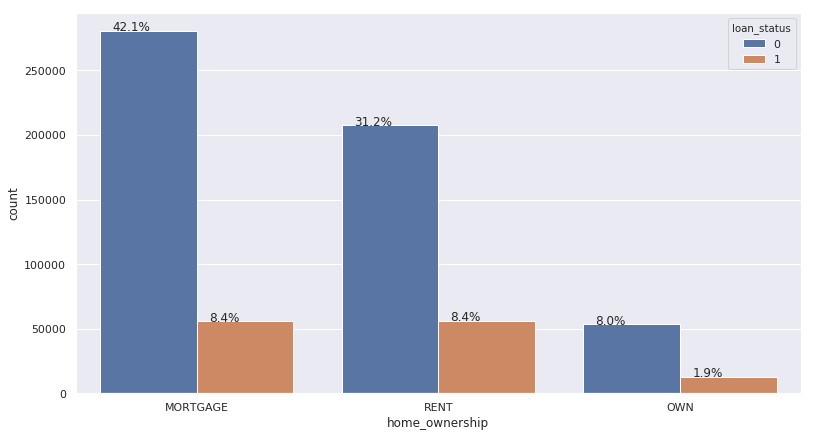

In [0]:
univariate(df=loan_data,col='home_ownership',vartype=1,hue='loan_status')

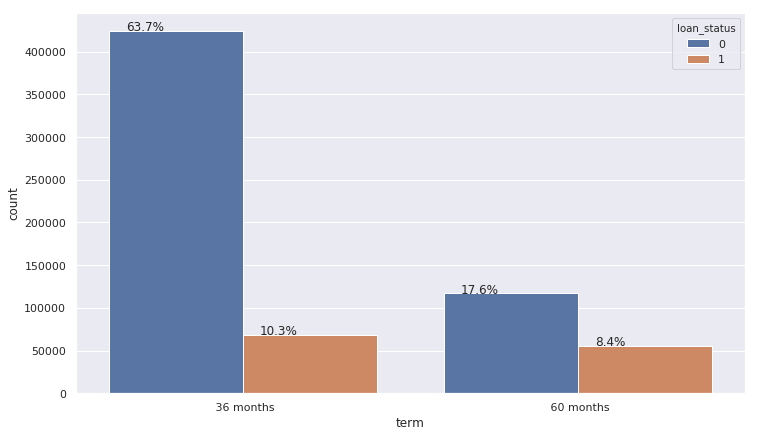

In [0]:
univariate(df=loan_data,col='term',vartype=1,hue='loan_status')

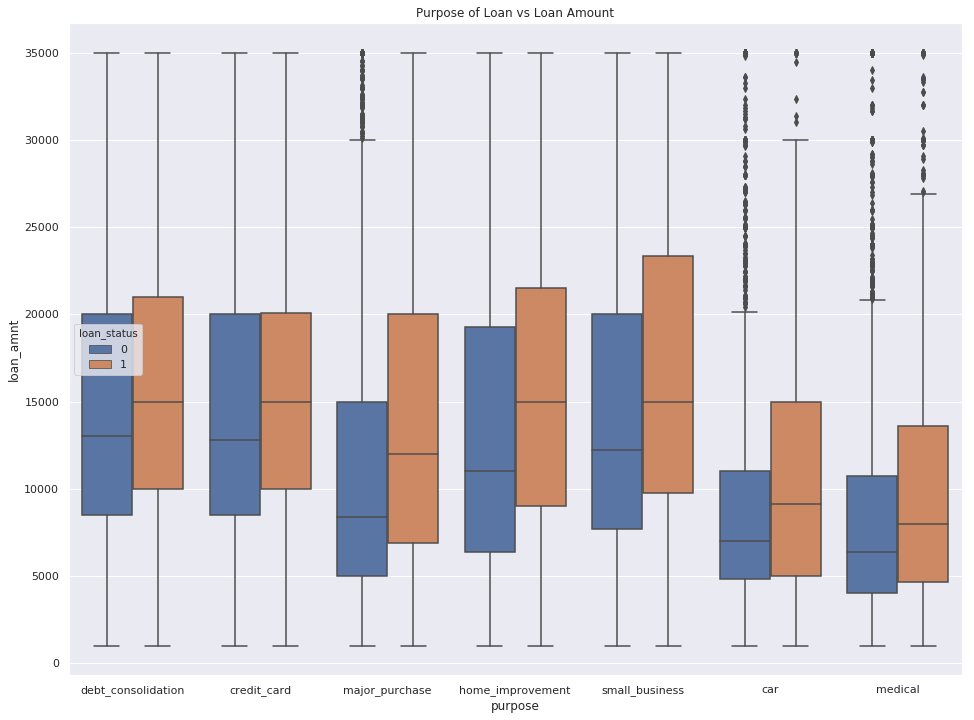

In [0]:
## Multivariate Analysis
plt.figure(figsize=(16,12))
sns.boxplot(data =loan_data, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

In [0]:
loan_data_filter = loan_data.loc[:,['loan_amnt','funded_amnt','funded_amnt_inv']]
loan_data_filter.corr()

,loan_amnt,funded_amnt,funded_amnt_inv
loan_amnt,1.000000,0.999957,0.999939
funded_amnt,0.999957,1.000000,0.999985
funded_amnt_inv,0.999939,0.999985,1.000000


In [0]:
loan_data["purpose_cat"]= loan_data["purpose"].astype('category')
loan_data["purpose_cat"] = loan_data["purpose_cat"].cat.codes

In [0]:
features = ["funded_amnt","emp_length","annual_inc","home_ownership","grade","purpose_cat","loan_income_ratio","dti",
            "last_pymnt_amnt", "pub_rec","term", "mort_acc", "int_rate", "open_acc","revol_util","num_actv_rev_tl",
            "mo_sin_rcnt_rev_tl_op","mo_sin_old_rev_tl_op","bc_util","bc_open_to_buy",
            "avg_cur_bal","acc_open_past_24mths",'loan_status']
loan_data_final = loan_data[features]
loan_data_final= loan_data_final.reset_index(drop=True)
print("Shape of dataset :",loan_data_final.shape)

Shape of dataset : (665912, 23)


In [0]:
## Function to remove % and convert to float
def stripFn(s):
  s = s.strip()
  if(s.find('%')!=-1):
    s = s.split('%')[0]
  return float(s)

# **Encode Categorical Data:**
> Grade - Borrower's grade given basing on his/her past history - encoded to numerical values

> Term - Term of loan - encoded to numerical values

> home_ownership - this is feature in the dataset which had to be encoded to numerical values 

> Emp_Length - this feature was not formatted properly. It has some values which was in the format like "10+years","5years"...etc. I changed them to numerical values in the below cell

In [0]:
loan_data_final["emp_length"] = loan_data_final["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
loan_data_final["emp_length"] = pd.to_numeric(loan_data_final["emp_length"], errors='coerce')
loan_data_final["int_rate"] = loan_data_final["int_rate"].apply(lambda x:stripFn(str(x)))
loan_data_final["revol_util"] = loan_data_final["revol_util"].apply(lambda x:stripFn(str(x)))


In [0]:
loan_data_final['grade'] = loan_data_final['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
loan_data_final['term'] = loan_data_final['term'].map({' 36 months':3,' 60 months':5})
loan_data_final["home_ownership"] = loan_data_final["home_ownership"].map({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})

In [0]:
loan_data_final[loan_data_final==np.inf]=np.nan
loan_data_final.fillna(loan_data_final.median(), inplace=True)

The data was scaled using Standard Scalar. The missing values were filled using median of the column.

In [0]:
loan_data_final.fillna(loan_data_final.median(),inplace = True)
print("Current shape of dataset :",loan_data_final.shape)
scl = preprocessing.StandardScaler() #instance of preprocessing
fields = loan_data_final.columns.values[:-1]
loan_data_scaled = pd.DataFrame(scl.fit_transform(loan_data_final[fields]), columns = fields)
loan_data_scaled['loan_status'] = loan_data_final['loan_status']
loan_data_scaled['loan_status'].value_counts()

Current shape of dataset : (665912, 23)


0    541592
1    124320
Name: loan_status, dtype: int64

In [0]:

loanstatus_0 = loan_data_scaled[loan_data_scaled["loan_status"]==0]
loanstatus_1 = loan_data_scaled[loan_data_scaled["loan_status"]==1]
subset_loanstatus_0 = loanstatus_0.sample(n=15000)
subset_loanstatus_1 = loanstatus_1.sample(n=15000)
loan_data_sample = pd.concat([subset_loanstatus_1, subset_loanstatus_0])
loan_data_sample = loan_data_sample.sample(frac=1).reset_index(drop=True)
print("Current shape of dataset :",loan_data_sample.shape)
loan_data_sample.head()

Current shape of dataset : (30000, 23)


,funded_amnt,emp_length,annual_inc,home_ownership,grade,purpose_cat,loan_income_ratio,dti,last_pymnt_amnt,pub_rec,term,mort_acc,int_rate,open_acc,revol_util,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,-1.026676,-0.907651,-0.483353,-0.610609,0.561176,-1.094031,-0.984702,-0.241682,-0.432091,-0.342437,-0.591828,-0.845895,-0.252632,-0.690886,0.529964,-1.191389,-0.375923,-1.196178,1.349595,-0.643444,-0.516173,-0.820057,0
1,-0.579150,1.127640,-0.049570,0.895875,-0.214760,0.121930,-0.746771,-1.804530,-0.680892,-0.342437,-0.591828,-0.362458,-1.484056,-1.634241,-1.341497,-0.877131,-0.563558,-0.900242,0.947075,-0.586681,-0.722359,-1.152465,1
2,2.444681,1.127640,1.306002,0.895875,-0.214760,0.121930,0.605107,-0.910435,-0.600338,-0.342437,1.689680,3.505038,-1.481191,-0.313544,-1.354113,-0.562872,-0.688647,0.415027,-0.614100,0.663983,3.792519,-0.820057,1
3,-0.857342,-1.489163,-1.134027,-0.610609,-0.990696,0.121930,0.287146,0.677854,-0.351347,-0.342437,-0.591828,-0.845895,1.186151,-0.124873,-0.131989,0.379902,-0.751192,-1.229059,-0.663005,-0.309528,-0.623615,0.841983,0
4,-0.591245,-1.489163,-0.537575,-0.610609,-0.214760,-1.094031,-0.315002,1.378107,-0.272837,-0.342437,-0.591828,-0.845895,-1.484056,-0.124873,-1.339727,-0.877131,-0.438468,-0.889282,1.270595,-0.640331,-0.390178,-0.155241,0


In [0]:
cmap = cmap=sns.diverging_palette(10, 240, as_cmap=True)
corr = loan_data_sample.corr()
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,funded_amnt,emp_length,annual_inc,home_ownership,grade,purpose_cat,loan_income_ratio,dti,last_pymnt_amnt,pub_rec,term,mort_acc,int_rate,open_acc,revol_util,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
funded_amnt,1,0.1,0.5,0.15,-0.2,-0.014,0.54,0.021,0.32,-0.085,0.42,0.22,0.1,0.19,0.083,0.15,0.06,0.16,0.056,0.18,0.23,0.018,0.074
emp_length,0.1,1,0.092,0.13,-0.0021,0.014,-0.0039,0.029,0.032,0.031,0.058,0.19,-0.012,0.029,0.012,0.12,0.019,0.19,0.033,0.011,0.086,0.018,-0.0091
annual_inc,0.5,0.092,1,0.2,0.089,0.061,-0.35,-0.23,0.23,-0.0089,0.1,0.33,-0.033,0.19,0.067,0.11,0.054,0.19,0.002,0.19,0.41,0.076,-0.087
home_ownership,0.15,0.13,0.2,1,0.039,0.03,-0.049,-0.027,0.11,-0.01,0.097,0.39,-0.048,0.085,-0.00056,0.038,0.016,0.092,0.028,0.032,0.38,0.032,-0.06
grade,-0.2,-0.0021,0.089,0.039,1,-0.15,-0.29,-0.18,0.0073,-0.051,-0.49,0.062,-0.52,-0.025,-0.14,-0.097,0.12,0.13,-0.24,0.26,0.074,-0.21,-0.32
purpose_cat,-0.014,0.014,0.061,0.03,-0.15,1,-0.073,-0.057,-0.017,0.037,0.012,0.02,0.077,-0.029,-0.069,-0.063,0.00049,0.0013,-0.1,0.011,0.04,0.019,0.035
loan_income_ratio,0.54,-0.0039,-0.35,-0.049,-0.29,-0.073,1,0.24,0.11,-0.082,0.35,-0.089,0.15,0.0047,0.034,0.047,0.023,0.0026,0.061,0.013,-0.13,-0.07,0.17
dti,0.021,0.029,-0.23,-0.027,-0.18,-0.057,0.24,1,-0.062,-0.059,0.1,-0.063,0.16,0.28,0.16,0.24,-0.025,0.032,0.16,-0.059,-0.12,0.17,0.14
last_pymnt_amnt,0.32,0.032,0.23,0.11,0.0073,-0.017,0.11,-0.062,1,-0.034,0.15,0.16,0.0046,0.044,0.0016,-0.011,0.031,0.081,-0.038,0.12,0.16,-0.011,-0.48
pub_rec,-0.085,0.031,-0.0089,-0.01,-0.051,0.037,-0.082,-0.059,-0.034,1,-0.032,0.0094,0.11,-0.022,0.004,0.005,-0.064,0.049,-0.066,-0.076,-0.063,0.1,0.024


There is significant correlation between revol_util and int_rate and num_actv_rev_tl and open_acc. There is also some correlation between term and funded amount and term and grade.But for now we do not remove any variables.

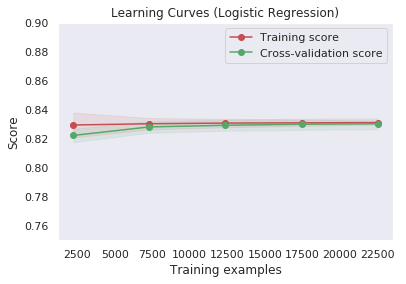

In [0]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

X, y = loan_data_sample.iloc[:,:-1].values, loan_data_sample.iloc[:,-1].values
title = "Learning Curves (Logistic Regression)"
# Cross validation with 500 iterations to get smoother mean test and train
# score curves, each time with 25% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.25, random_state=0)
estimator = linear_model.LogisticRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.75, 0.90), cv=cv, n_jobs=4)
plt.show()

The training and validation scores converge around 17500 sample size

In [0]:
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

In [0]:
## Confusion Matrix fn.
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["No Default", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(loan_data_sample.iloc[:,:-1], loan_data_sample.iloc[:,-1], test_size=0.25, random_state=42)
bs_train, bs_test = train_test_split(loan_data_sample, test_size = 0.25, random_state=42) 

In [0]:
X_train.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,purpose_cat,loan_income_ratio,dti,last_pymnt_amnt,pub_rec,term,mort_acc,int_rate,open_acc,revol_util,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths
21177,-0.337243,-0.616896,0.357102,0.895875,0.561176,1.337891,-0.762040,0.026062,0.031523,-0.342437,-0.591828,-0.362458,-1.488316,-0.124873,-1.348509,0.065644,1.062607,-1.020808,0.205987,-0.528832,0.368848,-0.820057
23942,0.025617,-0.035384,0.872219,0.895875,0.561176,-1.094031,-0.734292,-0.132646,-0.658599,-0.342437,-0.591828,0.120979,-1.490445,-0.879557,-1.345462,-1.191389,-0.501013,2.574260,-1.152047,-0.412266,-0.315492,-0.820057
1247,-0.821056,-1.489163,-0.510464,-0.610609,-0.214760,-1.094031,-0.673311,-1.317503,-0.692320,1.339220,-0.591828,-0.845895,0.536477,-0.502215,-0.400703,-0.877131,0.124435,-0.823518,-1.385283,-0.300985,-0.760551,1.174391
23622,-1.564918,1.127640,-0.727356,-0.610609,0.561176,-1.094031,-1.671096,-0.431889,-0.725374,1.339220,-0.591828,-0.845895,0.246882,-0.502215,0.100677,-0.877131,0.312069,-0.911203,-0.098724,-0.445136,-0.759464,-0.155241
28454,1.114196,-0.035384,0.492659,0.895875,0.561176,-1.094031,0.377992,-1.138199,2.424789,-0.342437,-0.591828,1.087853,-1.490445,0.063798,-1.353261,0.065644,-0.563558,-0.407016,0.992217,-0.482640,1.010102,-0.487649


In [0]:
from sklearn.feature_selection import RFE
# create the RFE model and select 3 attributes
clf_LR = linear_model.LogisticRegression(C=1e30)
clf_LR.fit(X_train,y_train)
rfe = RFE(clf_LR, 12)
rfe = rfe.fit(loan_data_sample.iloc[:,:-1].values, loan_data_sample.iloc[:,-1].values)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True False False False  True False  True  True  True False  True False
  True  True False False False  True False  True  True  True]
[ 1  4  9  5  1 11  1  1  1  6  1  8  1  1  2  7  3  1 10  1  1  1]


In [0]:
#PCA (Principal Component Analysis)
from sklearn.decomposition import PCA 
pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print('Expected Variance is '+ str(explained_variance))

Expected Variance is [0.1413407  0.12398574 0.10933749 0.07962245 0.06843776 0.05284381
 0.05136127 0.04489869 0.04468812 0.03833293 0.0339047  0.03295964]


In [0]:
# Dump components relations with features:
print(pd.DataFrame(pca.components_,columns=X_train.columns))

    funded_amnt  emp_length  annual_inc  home_ownership     grade  \
0      0.340631    0.083107    0.111104        0.084072 -0.373563   
1      0.229016    0.152111    0.402768        0.278157  0.253143   
2     -0.185218   -0.042773   -0.122674       -0.152713  0.079529   
3      0.319648   -0.091916   -0.160966       -0.139677 -0.036469   
4     -0.058226   -0.138413    0.114793        0.015027 -0.285071   
5      0.139509   -0.209165    0.234779       -0.406928  0.232712   
6     -0.128800    0.503988   -0.249798       -0.035925 -0.026774   
7      0.146326    0.148471    0.142040       -0.175725 -0.038544   
8      0.139484    0.110512    0.297996       -0.319912 -0.152280   
9      0.065287   -0.694007   -0.011198        0.126577  0.017295   
10     0.276382    0.251012   -0.030196        0.234715  0.223729   
11    -0.082491    0.193389    0.124843        0.056050 -0.001613   

    purpose_cat  loan_income_ratio       dti  last_pymnt_amnt   pub_rec  \
0      0.012726           0

In [0]:
features = ['funded_amnt','annual_inc','grade','loan_income_ratio','dti','last_pymnt_amnt','term','int_rate','open_acc','mo_sin_rcnt_rev_tl_op','mo_sin_old_rev_tl_op',
            'revol_util','bc_util','bc_open_to_buy','avg_cur_bal','acc_open_past_24mths','loan_status']
X_train, X_test = X_train[features[:-1]], X_test[features[:-1]]
loan_data_sample2 = loan_data_sample[features]
print(X_train.shape)
print(loan_data_sample2.shape)

(22500, 16)
(30000, 17)


In [0]:
sns.set_context(context='notebook')
corr = loan_data_sample2.corr()


corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,funded_amnt,annual_inc,grade,loan_income_ratio,dti,last_pymnt_amnt,term,int_rate,open_acc,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,revol_util,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
funded_amnt,1,0.5,-0.2,0.54,0.021,0.32,0.42,0.1,0.19,0.06,0.16,0.083,0.056,0.18,0.23,0.018,0.074
annual_inc,0.5,1,0.089,-0.35,-0.23,0.23,0.1,-0.033,0.19,0.054,0.19,0.067,0.002,0.19,0.41,0.076,-0.087
grade,-0.2,0.089,1,-0.29,-0.18,0.0073,-0.49,-0.52,-0.025,0.12,0.13,-0.14,-0.24,0.26,0.074,-0.21,-0.32
loan_income_ratio,0.54,-0.35,-0.29,1,0.24,0.11,0.35,0.15,0.0047,0.023,0.0026,0.034,0.061,0.013,-0.13,-0.07,0.17
dti,0.021,-0.23,-0.18,0.24,1,-0.062,0.1,0.16,0.28,-0.025,0.032,0.16,0.16,-0.059,-0.12,0.17,0.14
last_pymnt_amnt,0.32,0.23,0.0073,0.11,-0.062,1,0.15,0.0046,0.044,0.031,0.081,0.0016,-0.038,0.12,0.16,-0.011,-0.48
term,0.42,0.1,-0.49,0.35,0.1,0.15,1,0.28,0.094,-0.0048,0.03,0.076,0.055,0.0078,0.082,0.064,0.24
int_rate,0.1,-0.033,-0.52,0.15,0.16,0.0046,0.28,1,0.063,-0.082,-0.047,0.68,0.067,-0.12,-0.037,0.21,0.21
open_acc,0.19,0.19,-0.025,0.0047,0.28,0.044,0.094,0.063,1,-0.22,0.12,-0.048,-0.11,0.26,-0.12,0.48,0.048
mo_sin_rcnt_rev_tl_op,0.06,0.054,0.12,0.023,-0.025,0.031,-0.0048,-0.082,-0.22,1,0.065,0.1,0.12,-0.051,0.16,-0.4,-0.06


# **Models**
**Random Forest**

After implementing Random forest with randomized search, I got the best accuracies but default prediction was not upto the mark. I used the randomized search to find the best hyper paramters for the model.

In [0]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(criterion='gini', random_state=42)
maxFeatures = range(1,loan_data_sample2.shape[1]-1)
param_dist = dict(max_features=maxFeatures)
rand = RandomizedSearchCV(rf, param_dist, cv=10, scoring='accuracy', n_iter=len(maxFeatures), random_state=10)
X=loan_data_sample2.iloc[:,:-1].values
y=loan_data_sample2.iloc[:,-1].values
rand.fit(X,y)
mean_scores = rand.cv_results_['mean_test_score']
print(rand.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [0]:

randomForest = RandomForestClassifier(bootstrap=True,criterion = "gini",max_features=7,min_samples_leaf=1,n_estimators=20, min_samples_split=2,random_state=42 )
randomForest.fit(X_train,y_train)
rfPredict = randomForest.predict(X_test)
rfPredictproba = randomForest.predict_proba(X_test)[:,1] #for ROC curve
rfAccuracy = accuracy_score(y_test,rfPredict)
roc_score = metrics.roc_auc_score(y_test,rfPredict)
print(rfAccuracy)

0.8324


Text(0, 0.5, 'Normalized Gini Importance')

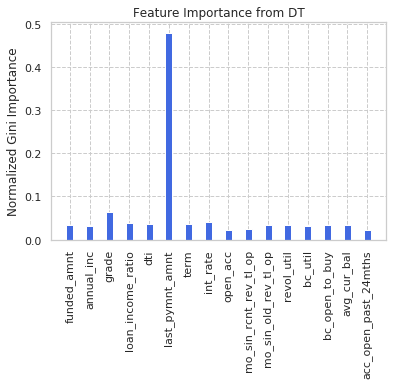

In [0]:
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(X_train.shape[1]), randomForest.feature_importances_, width, color='royalblue')
ax.set_xticks(np.arange(len(randomForest.feature_importances_)))
ax.set_xticklabels(X_train.columns.values,rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')

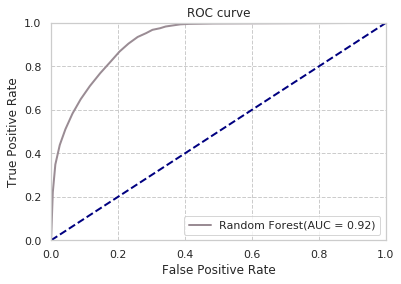

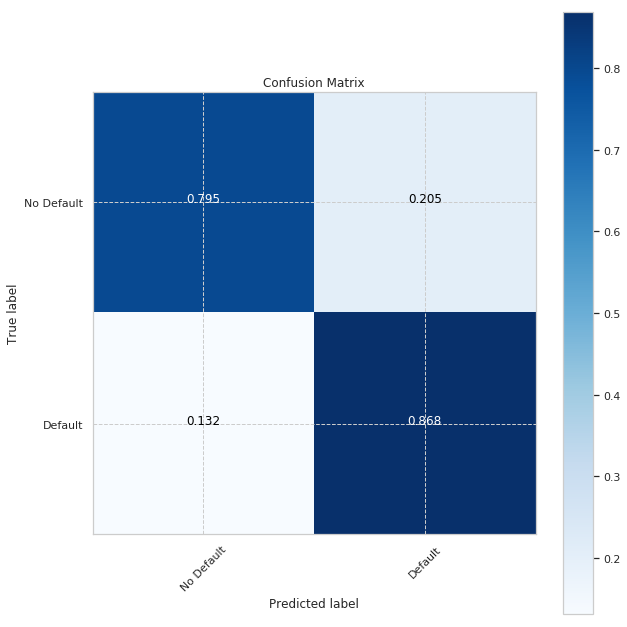

In [0]:
plotAUC(y_test,rfPredictproba, 'Random Forest')
plt.show()
plt.figure(figsize=(9,9))
plot_confusion_matrix(rfPredict, normalize=True)
plt.show()

# **Logistic Regression with Grid Search**

After implementing Logistic Regressionwith grid search, I got the less false negatives. I used the randomized search to find the best hyper paramters for the model.

In [0]:
from sklearn.model_selection import GridSearchCV
def cross_validation_best_parameters(model, param_grid):
    grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
    X=loan_data_sample2.iloc[:,:-1].values
    y=loan_data_sample2.iloc[:,-1].values
    grid.fit(X,y)
    mean_scores = grid.cv_results_['mean_test_score']
    return mean_scores,grid.best_score_,grid.best_estimator_
logreg = linear_model.LogisticRegression(random_state=0)
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
mean_scores,Best_Accuracy, Best_classifier = cross_validation_best_parameters(logreg,param_grid)
print("Best accuracy is "+ str(Best_Accuracy))
print(Best_classifier)

Best accuracy is 0.8314333333333334
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Logistic regression accuracy is  0.8246666666666667


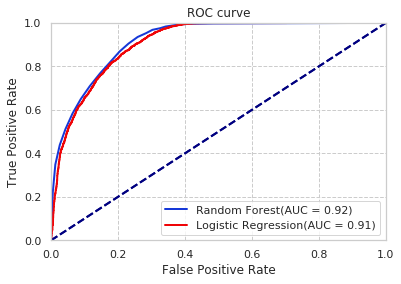

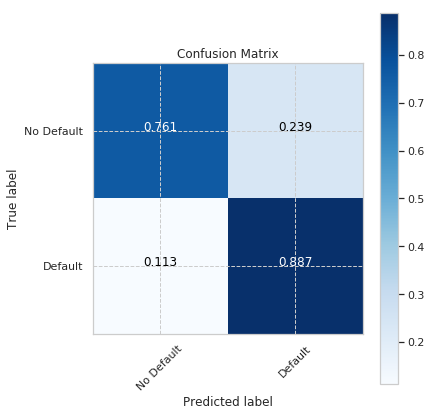

In [0]:
clf_LR = linear_model.LogisticRegression(C=Best_classifier.C)
clf_LR.fit(X_train,y_train)
LR_Predict = clf_LR.predict_proba(X_test)[:,1]
LR_Predict_bin = clf_LR.predict(X_test)
LR_Accuracy = accuracy_score(y_test,LR_Predict.round())
print("Logistic regression accuracy is ",LR_Accuracy)
plotAUC(y_test,rfPredictproba, 'Random Forest')
plotAUC(y_test,LR_Predict,'Logistic Regression')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(LR_Predict_bin, normalize=True)
plt.show()

# **K Nearest Neighbors(KNN) with Grid Search CV**
KNN (K Nearest Neighbors) when implemented with grid search, I got the best accuracies and minimum false negatives. I used the Grid search to find the best hyper paramters.Later I used this value to find the predictions and plot the ROC curve.

In [0]:
from sklearn.model_selection import GridSearchCV    ## takes too much time to run this cell.
clf_knn = KNeighborsClassifier()
k_range = list(range(35, 50))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(clf_knn, param_grid, cv=10, scoring='accuracy')
grid.fit(loan_data_sample2.iloc[:,:-1].values, loan_data_sample2.iloc[:,-1].values)
grid_mean_scores = grid.cv_results_['mean_test_score']# create a list of the mean scores only
print(grid.best_params_)
print("---------------")
print(grid.best_estimator_)

{'n_neighbors': 46}
---------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=46, p=2,
                     weights='uniform')


 46
KNN accuracy is  0.7570666666666667


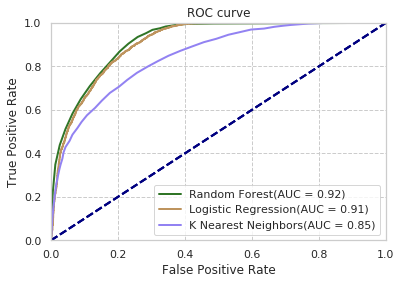

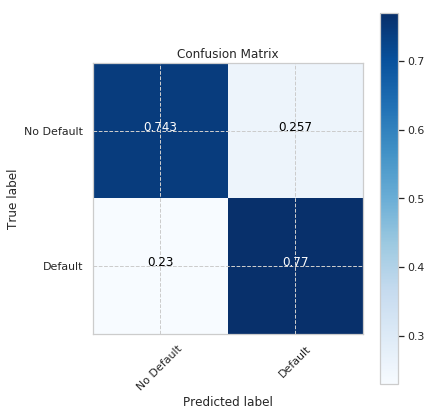

In [0]:
print("",grid.best_params_['n_neighbors'])
clf_knn_final = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])   #taking the the best from the above cell and using it to find predictions
clf_knn_final.fit(X_train,y_train)
knn_pred = clf_knn_final.predict(X_test)
knn_predictproba = clf_knn_final.predict_proba(X_test)[:,1]
KNN_Acc = accuracy_score(y_test,knn_pred)
print("KNN accuracy is ",KNN_Acc)
plotAUC(y_test,rfPredictproba, 'Random Forest')
plotAUC(y_test,LR_Predict,'Logistic Regression')
plotAUC(y_test,knn_predictproba,'K Nearest Neighbors')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(knn_pred, normalize=True)
plt.show()

# **Multi-Layer Perceptron Classifier**
A multilayer perceptron (MLP) is a feedforward Artificial Neural Network. It consists of a minimum of three layers of nodes and utilizes a supervised learning technique called backpropagation for training.Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable. I got highest accuracy and recall for MLP classifier for Default.

0.8325333333333333


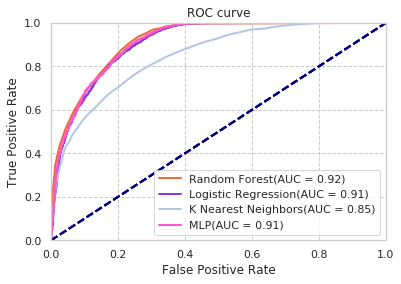

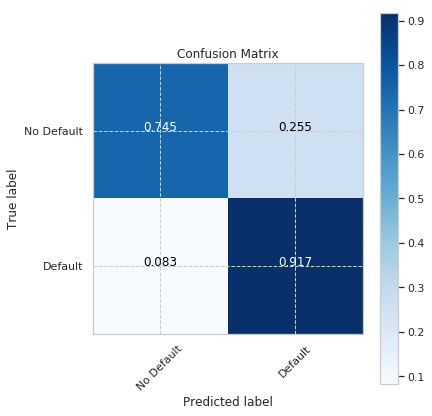

In [0]:
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(solver='adam',beta_1=0.95,activation='logistic', alpha=2e-3,hidden_layer_sizes=(30, 10), random_state=1)
clf_NN.fit(X_train,y_train)     
predict_NN = clf_NN.predict(X_test)
predictproba_NN = clf_NN.predict_proba(X_test)[:,1]
NNAccuracy = accuracy_score(y_test,predict_NN)
print(NNAccuracy)
plotAUC(y_test,rfPredictproba, 'Random Forest')
plotAUC(y_test,LR_Predict,'Logistic Regression')
plotAUC(y_test,knn_predictproba,'K Nearest Neighbors')
plotAUC(y_test,predictproba_NN,'MLP')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(predict_NN, normalize=True)
plt.show()

In [0]:
from sklearn.metrics import classification_report
print("RF",classification_report(y_test, rfPredict, target_names=None))
print("LR",classification_report(y_test, LR_Predict_bin, target_names=None))
print("KNN",classification_report(y_test, knn_pred, target_names=None))
print("MLP",classification_report(y_test, predict_NN, target_names=None))

RF               precision    recall  f1-score   support

           0       0.85      0.80      0.82      3692
           1       0.81      0.87      0.84      3808

    accuracy                           0.83      7500
   macro avg       0.83      0.83      0.83      7500
weighted avg       0.83      0.83      0.83      7500

LR               precision    recall  f1-score   support

           0       0.87      0.76      0.81      3692
           1       0.79      0.89      0.84      3808

    accuracy                           0.82      7500
   macro avg       0.83      0.82      0.82      7500
weighted avg       0.83      0.82      0.82      7500

KNN               precision    recall  f1-score   support

           0       0.76      0.74      0.75      3692
           1       0.76      0.77      0.76      3808

    accuracy                           0.76      7500
   macro avg       0.76      0.76      0.76      7500
weighted avg       0.76      0.76      0.76      7500

MLP      